<a href="https://colab.research.google.com/github/GMaina716/AUTOLIB-ANALYSIS/blob/main/George_Maina_Auto_Lib_Analysis_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt

In [2]:
autos=pd.read_csv('/content/Autolib_dataset (2).csv')
autos.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [3]:
#creating a copy of the dataset
auto=autos.copy()
auto.shape

(5000, 25)

In [4]:
#getting a look at the data first
print('shape of original dataset', auto.shape)
print('size of the original dataset',auto.size)
print('dimensions of the original dataset',auto.ndim)

shape of original dataset (5000, 25)
size of the original dataset 125000
dimensions of the original dataset 2


In [5]:
#look at info of the data
print('Info of the original dataset\n\n\n')
auto.info()

Info of the original dataset



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47

In [6]:
#statistical summary of the dataset
auto.describe().T

,count,mean,std,min,25%,50%,75%,max
Cars,5000.0,2.3336,2.035274,0.0,0.0,2.0,4.0,7.0
Bluecar counter,5000.0,2.3336,2.035274,0.0,0.0,2.0,4.0,7.0
Utilib counter,5000.0,0.0596,0.246698,0.0,0.0,0.0,0.0,2.0
Utilib 1.4 counter,5000.0,0.1230,0.356506,0.0,0.0,0.0,0.0,3.0
Charge Slots,5000.0,0.2534,0.546304,0.0,0.0,0.0,0.0,2.0
Postal code,5000.0,82634.8784,8835.865721,75001.0,75012.0,75019.0,92320.0,95880.0
Slots,5000.0,1.9324,1.905402,0.0,0.0,1.0,3.0,7.0
year,5000.0,2018.0000,0.000000,2018.0,2018.0,2018.0,2018.0,2018.0
month,5000.0,4.0000,0.000000,4.0,4.0,4.0,4.0,4.0
day,5000.0,4.9416,2.597063,1.0,3.0,5.0,7.0,9.0


**DATA CLEANING**

In this stage we will try to prepare the data to be in a format that is usable

**1. Data Accuracy**

In [7]:
#to look for the number of columns with missing values
missing=auto.isna().sum()
missing=missing[missing!=0]

# a look at the 
print('number of columns with missing values',len(missing))

missing.sort_values(ascending=True)

number of columns with missing values 2


Displayed comment    4889
Scheduled at         4953
dtype: int64

In [8]:
#we will drop these two columns
#missing data can compromise onthe quality of our data and hence the quality of our model
auto.drop(['Displayed comment','Scheduled at'],axis=1,inplace=True)

**2. Consistency**

In [9]:
# to check for duplicated value
print('sum of duplicated rows in the dataset: ',auto.duplicated().sum())
print('shape of the original dataset: ',auto.shape)
print('shape of the dataset after duplicate rows have been drooped: ',auto.drop_duplicates().shape)

sum of duplicated rows in the dataset:  0
shape of the original dataset:  (5000, 23)
shape of the dataset after duplicate rows have been drooped:  (5000, 23)


In [ ]:
# the result above suggest that the dataset has not have duplicate rows

**3. Data Validity and Uniformity**

In [10]:
# we will rename the columns into a uniform convention
# we will also remove white spaces in all the columns
auto.columns =auto.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
auto.columns

Index(['address', 'cars', 'bluecar_counter', 'utilib_counter',
       'utilib_1.4_counter', 'charge_slots', 'charging_status', 'city', 'id',
       'kind', 'geo_point', 'postal_code', 'public_name', 'rental_status',
       'slots', 'station_type', 'status', 'subscription_status', 'year',
       'month', 'day', 'hour', 'minute'],
      dtype='object')

In [11]:
# we will drop some rows and columns that will not be of use to the analysis
auto.drop(['month','day','minute','address','year','subscription_status','geo_point','kind','charge_slots','charging_status','slots','status'],axis=1,inplace=True)

In [12]:
# to check if the columns were dropped
auto.columns

Index(['cars', 'bluecar_counter', 'utilib_counter', 'utilib_1.4_counter',
       'city', 'id', 'postal_code', 'public_name', 'rental_status',
       'station_type', 'hour'],
      dtype='object')

**4. Accuracy**

In [13]:
#to check if the total observation in the cars column and bluecar counter
print('sum of count in cars column: ',auto['cars'].sum())
print('sum of bluecar counter: ',auto['bluecar_counter'].sum())

sum of count in cars column:  11668
sum of bluecar counter:  11668


In [14]:
# we observe that the records in the two columns concour with each other 
# the means that there was no error in how they were recorded.

**DATA ANALYSIS**

1. Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

In [17]:
# we first filter out all the rows with the city of Paris from the entire dataset
paris=auto[auto['city'].map(lambda city: 'Paris' in city)]

#we then filter this dataset to have only the stations that are operationa
pariss=paris[paris['rental_status']=='operational']
pariss.head(3)

,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,postal_code,public_name,rental_status,station_type,hour
0,0,0,0,0,Paris,paris-suffren-2,75015,Paris/Suffren/2,operational,station,11
1,6,6,0,0,Paris,paris-raymondlosserand-145,75014,Paris/Raymond Losserand/145,operational,station,7
3,3,3,1,0,Paris,paris-eugeneoudine-51,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,station,4


In [18]:
#we then create a pivot table
parisspivot=pd.pivot_table(paris,values=['bluecar_counter'],index=['hour'],aggfunc=np.sum,fill_value=0)
parisspivot.sort_values(by='bluecar_counter',ascending=False).head(5)

,bluecar_counter
hour,
21,268
6,260
12,250
9,250
3,242


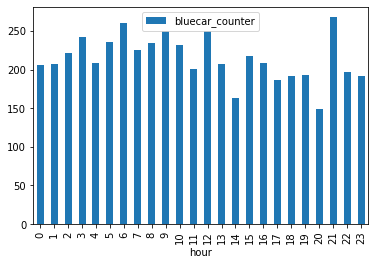

In [19]:
#to have a look at how the table is in a visual
parisspivot.plot(kind='bar')
plt.show()

In [20]:
# the most popular hour for picking up cars is at 9PM / 2100hrs

2. Most popular station overall

In [21]:
#filter out to get only the operational rental status
auto=auto[auto['rental_status']=='operational']

In [22]:
print('number of unique stations:' ,auto['id'].nunique())

number of unique stations: 1026


In [23]:
# the are 1026 operational unique stations

In [24]:
auto.groupby('id')['cars'].agg(sum).sort_values(ascending=False).head(3)

id
fontenayauxroses-robertmarchand-32    50
leplessisrobinson-galilee-16          49
fontenayauxroses-lombard-20           47
Name: cars, dtype: int64

In [25]:
# the most popular station was fontenayauxroses-robertmarchand-32

In [26]:
auto.groupby('id')['cars'].agg(sum).sort_values(ascending=True).head(3)

id
paris-lobau-parking             0
epinaysurseine-argenteuil-28    0
paris-dutuit-1                  0
Name: cars, dtype: int64

3. **popular station at the most popular picking up time**

In [27]:
#we will filter the dataset to get only pick up times that were at 21 hrs

In [28]:
popstime=auto.loc[auto['hour']==21]
popstime.head(2)

,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,postal_code,public_name,rental_status,station_type,hour
13,0,0,0,0,Paris,paris-jeanmoulin-34,75014,Paris/Jean Moulin/34,operational,station,21
19,4,4,0,2,Paris,paris-renecoty-11,75014,Paris/RenÃ© Coty/11,operational,station,21


In [29]:
print('the number of observation/ pickups at 9pm were: ',popstime.shape)

the number of observation/ pickups at 9pm were:  (209, 11)


In [30]:
#creating  a pivot table
popstimepivot=pd.pivot_table(popstime,values=['bluecar_counter','id'],index=['public_name','station_type'],aggfunc=np.sum)
popstimepivot.sort_values(by='bluecar_counter', ascending=False).head(10)

,,bluecar_counter
public_name,station_type,
Paris/Reille/59,station,8
Aulnay-sous-bois/Isidore Nerat/6,station,7
Paris/Boulard/1,station,7
Montreuil/Vincennes/11,station,6
Chaville/Anatole France/28,station,6
Dugny/Guynemer/17,full_station,6
Paris/Ãmile Reynaud/4,station,6
Nogent-sur-Marne/Georges ClÃ©menceau/10,station,6
Clamart/RÃ©publique/2,station,6


In [31]:
# the most popular station Paris/Reille/59
#the most popular full station is Dugny/Guynemer/17

4. **What postal code is the most popular for picking up Blue cars**

In [32]:
pospiv=pd.pivot_table(auto,values=['bluecar_counter'],index=['postal_code','public_name'],aggfunc=np.sum)
pospiv.sort_values(by='bluecar_counter',ascending=False).head(5)

bluecar_counter
postal_code public_name                                            
92260       Fontenay-aux-Roses/Robert Marchand/32                50
92350       Le Plessis-Robinson/GalilÃ©e/16                      49
92260       Fontenay-aux-Roses/Lombard/20                        47
            Fontenay-aux-Roses/Division Leclerc/31               43
75011       Paris/Philippe Auguste/126                           42

In [33]:
#The postal code most popular is 92260 and it is of the station Fontenay-aux-Roses/Robert Marchand/32	

5. Postal code of station most popular for picking blue cars at the popular picking hours

In [34]:
#popular hour is 2100 hrs
#we will use popstime table that we created in question 3
popstime.head(3)

,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,postal_code,public_name,rental_status,station_type,hour
13,0,0,0,0,Paris,paris-jeanmoulin-34,75014,Paris/Jean Moulin/34,operational,station,21
19,4,4,0,2,Paris,paris-renecoty-11,75014,Paris/RenÃ© Coty/11,operational,station,21
25,0,0,0,0,Paris,paris-voltaire-182,75011,Paris/Voltaire/182,operational,station,21


In [35]:
popcodhr=pd.pivot_table(auto,values=['bluecar_counter'],index=['postal_code','public_name'],aggfunc=np.sum,fill_value=0)
popcodhr.sort_values(by='bluecar_counter',ascending=False).head(5)

bluecar_counter
postal_code public_name                                            
92260       Fontenay-aux-Roses/Robert Marchand/32                50
92350       Le Plessis-Robinson/GalilÃ©e/16                      49
92260       Fontenay-aux-Roses/Lombard/20                        47
            Fontenay-aux-Roses/Division Leclerc/31               43
75011       Paris/Philippe Auguste/126                           42

**6. Postal code of station most popular for picking blue cars**

In [36]:
popcodhr1=pd.pivot_table(popstime,values=['bluecar_counter'],index=['postal_code','public_name'],aggfunc=np.sum)
popcodhr1.sort_values(by='bluecar_counter',ascending=False).head(5)

,,bluecar_counter
postal_code,public_name,
75014,Paris/Reille/59,8
93600,Aulnay-sous-bois/Isidore Nerat/6,7
75014,Paris/Boulard/1,7
93100,Montreuil/Vincennes/11,6
92600,AsniÃ¨res-sur-Seine/Georges Guynemer/97,6


In [37]:
# at the most popular car picking time, the most favourite station to pick a blue car is Paris/Reille/59

**7. Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars**

In [38]:
popcodhr=pd.pivot_table(auto,values=['utilib_counter'],index=['postal_code','public_name'],aggfunc=np.sum,fill_value=0)
popcodhr.sort_values(by='utilib_counter',ascending=False).head(5)

,,utilib_counter
postal_code,public_name,
75017,Paris/Mac Mahon/5,4
75014,Paris/Porte de Montrouge/8,4
92230,Gennevilliers/Petits marais/4,4
92360,Meudon/MarÃ©chal Juin/18,4
75015,Paris/HÃ©ricart/54,3


In [39]:
# the most popular station to pick up a utilib car is Paris/Mac Mahon/5,Paris/Porte de Montrouge/8,	Gennevilliers/Petits marais/4,Meudon/MarÃ©chal Juin/18

In [40]:
popcodhr=pd.pivot_table(auto,values=['utilib_1.4_counter'],index=['postal_code','public_name'],aggfunc=np.sum,fill_value=0)
popcodhr.sort_values(by='utilib_1.4_counter',ascending=False).head(5)

,,utilib_1.4_counter
postal_code,public_name,
92310,SÃ¨vres/Grande Rue/123,9
75014,Paris/Porte de Montrouge/8,7
92310,SÃ¨vres/WolfenbÃ¼ttel/1,7
75017,Paris/Clichy/181,4
91370,VerriÃ¨res-le-Buisson/MarÃ©chal Foch/56,4


In [41]:
#the most popular station to pick a utilib 1.4 is SÃ¨vres/Grande Rue/123